In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
wine = pd.read_csv("dane/winequality-all.csv", comment="#")
wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  response color  
0      9.4         3   red  
1      9.8         3   red  
2      9.8         3   red  
3      9.8         4   red  
4      9.4         3   red

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
fixed.acidity           5320 non-null float64
volatile.acidity        5320 non-null float64
citric.acid             5320 non-null float64
residual.sugar          5320 non-null float64
chlorides               5320 non-null float64
free.sulfur.dioxide     5320 non-null float64
total.sulfur.dioxide    5320 non-null float64
density                 5320 non-null float64
pH                      5320 non-null float64
sulphates               5320 non-null float64
alcohol                 5320 non-null float64
response                5320 non-null int64
color                   5320 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


In [6]:
wine.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994650   
75%       0.066000            41.000000            153.250000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol     response  
count  5320.000000  5320.000000  5320.000000  5320.000000  
mean      3.224664     0.533357    10.549241     3.795677  
std       0.160379     0.149743     1.185933     0.879772  
min       2.720000     0.220000     8.000000     1.000000  
25%       3.110000     0.430000     9.500000     3.000000  
50%       3.210000     0.510000    10.400000     4.000000  
75%       3.330000     0.600000    11.400000     4.000000  
max       4.010000     2.000000    14.900000     7.000000

In [5]:
wine.color = wine.color.astype("category")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
fixed.acidity           5320 non-null float64
volatile.acidity        5320 non-null float64
citric.acid             5320 non-null float64
residual.sugar          5320 non-null float64
chlorides               5320 non-null float64
free.sulfur.dioxide     5320 non-null float64
total.sulfur.dioxide    5320 non-null float64
density                 5320 non-null float64
pH                      5320 non-null float64
sulphates               5320 non-null float64
alcohol                 5320 non-null float64
response                5320 non-null int64
color                   5320 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 504.1 KB


In [7]:
wine.shape

(5320, 13)

In [8]:
print(wine.columns.str.cat(sep=", "))

fixed.acidity, volatile.acidity, citric.acid, residual.sugar, chlorides, free.sulfur.dioxide, total.sulfur.dioxide, density, pH, sulphates, alcohol, response, color


In [9]:
wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'response', 'color'],
      dtype='object')

In [12]:
wine.iloc[:, 0:11].describe().round(1).T.iloc[:, 1:]

mean   std  min   25%    50%    75%    max
fixed.acidity           7.2   1.3  3.8   6.4    7.0    7.7   15.9
volatile.acidity        0.3   0.2  0.1   0.2    0.3    0.4    1.6
citric.acid             0.3   0.1  0.0   0.2    0.3    0.4    1.7
residual.sugar          5.0   4.5  0.6   1.8    2.7    7.5   65.8
chlorides               0.1   0.0  0.0   0.0    0.0    0.1    0.6
free.sulfur.dioxide    30.0  17.8  1.0  16.0   28.0   41.0  289.0
total.sulfur.dioxide  114.1  56.8  6.0  74.0  116.0  153.2  440.0
density                 1.0   0.0  1.0   1.0    1.0    1.0    1.0
pH                      3.2   0.2  2.7   3.1    3.2    3.3    4.0
sulphates               0.5   0.1  0.2   0.4    0.5    0.6    2.0
alcohol                10.5   1.2  8.0   9.5   10.4   11.4   14.9

In [13]:
wine.color.value_counts()

white    3961
red      1359
Name: color, dtype: int64

In [14]:
white_wine = wine[wine.color == "white"]
white_wine = white_wine.iloc[:, 0:11]
white_wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1359                 45.0                 170.0   1.0010  3.00       0.45   
1360                 14.0                 132.0   0.9940  3.30       0.49   
1361                 30.0                  97.0   0.9951  3.26       0.44   
1362                 47.0                 186.0   0.9956  3.19       0.40   
1363                 30.0                 136.0   0.9949  3.18       0.47   

      alcohol  
1359      8.8  
1360      9.5  
1361     10.1  
1362      9.9  
1363      9.6

In [15]:
y = white_wine.iloc[:, -1]
y.head()

1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
Name: alcohol, dtype: float64

In [16]:
X = white_wine.iloc[:, :-1]
X.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  
1359                 45.0                 170.0   1.0010  3.00       0.45  
1360                 14.0                 132.0   0.9940  3.30       0.49  
1361                 30.0                  97.0   0.9951  3.26       0.44  
1362                 47.0                 186.0   0.9956  3.19       0.40  
1363                 30.0                 136.0   0.9949  3.18       0.47

In [17]:
corr_P = white_wine.corr("pearson")
corr_P.shape

(11, 11)

In [18]:
corr_P

fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.000000         -0.019214     0.298959   
volatile.acidity          -0.019214          1.000000    -0.163228   
citric.acid                0.298959         -0.163228     1.000000   
residual.sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free.sulfur.dioxide       -0.058396         -0.102471     0.091681   
total.sulfur.dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity               0.083620   0.024036            -0.058396   
volatile.acidity            0.098340   0.086287            -0.102471   
citric.acid                 0.106269   0.132590             0.091681   
residual.sugar              1.000000   0.076091             0.306835   
chlorides                   0.076091   1.000000             0.101272   
free.sulfur.dioxide         0.306835   0.101272             1.000000   
total.sulfur.dioxide        0.409583   0.191145             0.619437   
density                     0.820498   0.253088             0.294638   
pH                         -0.165997  -0.090573            -0.007750   
sulphates                  -0.020503   0.017871             0.037932   
alcohol                    -0.398167  -0.356928            -0.251768   

                      total.sulfur.dioxide   density        pH  sulphates  \
fixed.acidity                     0.082425  0.266091 -0.431274  -0.017453   
volatile.acidity                  0.102315  0.060603 -0.046954  -0.021150   
citric.acid                       0.122845  0.160076 -0.183015   0.049442   
residual.sugar                    0.409583  0.820498 -0.165997  -0.020503   
chlorides                         0.191145  0.253088 -0.090573   0.017871   
free.sulfur.dioxide               0.619437  0.294638 -0.007750   0.037932   
total.sulfur.dioxide              1.000000  0.536868  0.008239   0.136544   
density                           0.536868  1.000000 -0.063734   0.082048   
pH                                0.008239 -0.063734  1.000000   0.142353   
sulphates                         0.136544  0.082048  0.142353   1.000000   
alcohol                          -0.446643 -0.760162  0.093095  -0.022850   

                       alcohol  
fixed.acidity        -0.110788  
volatile.acidity      0.046815  
citric.acid          -0.076514  
residual.sugar       -0.398167  
chlorides            -0.356928  
free.sulfur.dioxide  -0.251768  
total.sulfur.dioxide -0.446643  
density              -0.760162  
pH                    0.093095  
sulphates            -0.022850  
alcohol               1.000000

In [19]:
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_P_tri

density               alcohol                -0.760162
total.sulfur.dioxide  alcohol                -0.446643
fixed.acidity         pH                     -0.431274
residual.sugar        alcohol                -0.398167
chlorides             alcohol                -0.356928
free.sulfur.dioxide   alcohol                -0.251768
citric.acid           pH                     -0.183015
residual.sugar        pH                     -0.165997
volatile.acidity      citric.acid            -0.163228
fixed.acidity         alcohol                -0.110788
volatile.acidity      free.sulfur.dioxide    -0.102471
chlorides             pH                     -0.090573
citric.acid           alcohol                -0.076514
density               pH                     -0.063734
fixed.acidity         free.sulfur.dioxide    -0.058396
volatile.acidity      pH                     -0.046954
sulphates             alcohol                -0.022850
volatile.acidity      sulphates              -0.021150
residual.s

In [20]:
corr_P_tri[abs(corr_P_tri)>0.5]

density               alcohol                -0.760162
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
dtype: float64

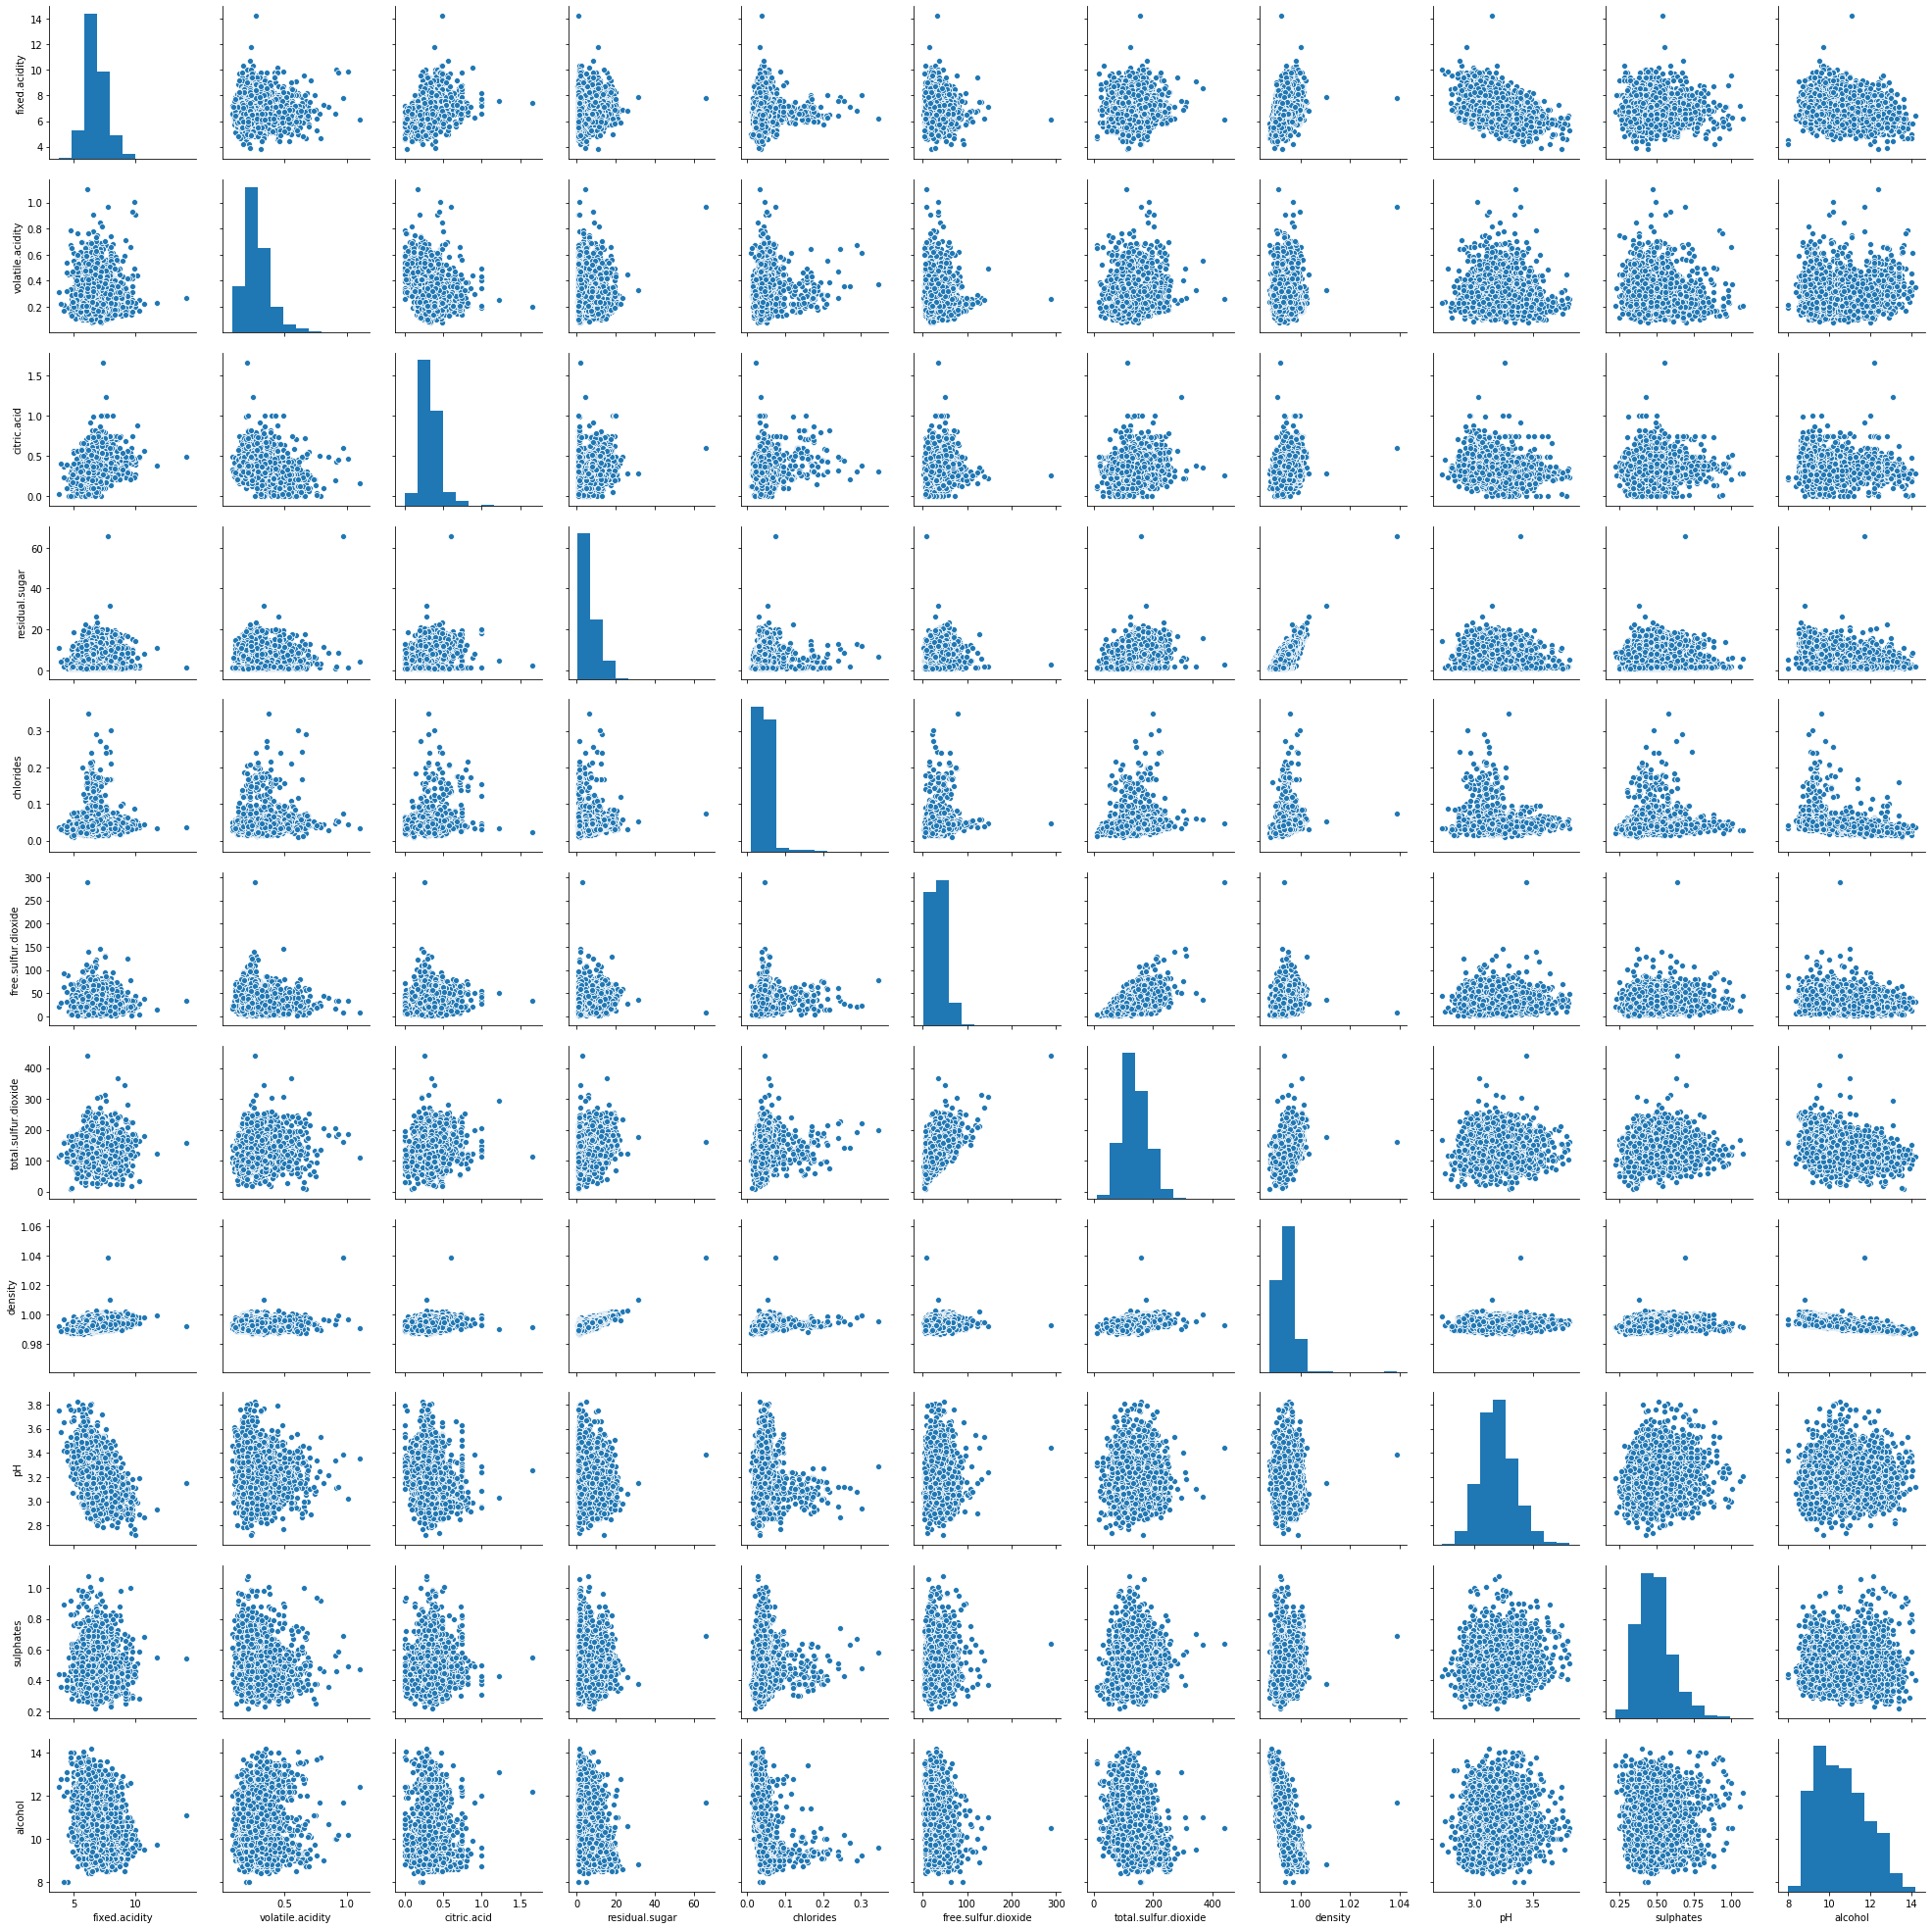

In [21]:
sns.pairplot(white_wine)
plt.show()

In [22]:
import sklearn.linear_model
mnk = sklearn.linear_model.LinearRegression()

In [23]:
mnk

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
help(sklearn.linear_model.LinearRegression())

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin, sklearn.base.MultiOutputMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False

In [25]:
mnk.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
np.round(mnk.coef_, 4)

array([ 5.09000e-01,  8.91400e-01,  4.16900e-01,  2.42700e-01,
       -3.94300e-01, -3.30000e-03,  3.00000e-04, -6.87861e+02,
        2.42820e+00,  1.01960e+00])

In [28]:
mnk.intercept_

680.7090390332953

In [29]:
white_wine.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358  
std       0.151546     0.113523     1.217076  
min       2.720000     0.220000     8.000000  
25%       3.090000     0.410000     9.500000  
50%       3.180000     0.480000    10.400000  
75%       3.290000     0.550000    11.400000  
max       3.820000     1.080000    14.200000

In [37]:
x_nowy = X.mean().values.reshape(1,-1)
x_nowy

array([[6.83934612e+00, 2.80537743e-01, 3.34332239e-01, 5.91481949e+00,
        4.59050745e-02, 3.48891694e+01, 1.37193512e+02, 9.93789530e-01,
        3.19545822e+00, 4.90350921e-01]])

In [38]:
mnk.predict(x_nowy)

array([10.58935791])

In [41]:
x_nowy[0][0] = 6.939346124715964

In [42]:
x_nowy

array([[6.93934612e+00, 2.80537743e-01, 3.34332239e-01, 5.91481949e+00,
        4.59050745e-02, 3.48891694e+01, 1.37193512e+02, 9.93789530e-01,
        3.19545822e+00, 4.90350921e-01]])

In [43]:
mnk.predict(x_nowy)

array([10.64025649])

In [44]:
y_pred = mnk.predict(X)
y_pred[0:10]

array([ 8.76177537,  9.46286638, 10.70447049,  9.96719912,  9.68406894,
       10.17792583, 11.86187488, 10.38714494, 11.29369773, 11.9224763 ])

In [45]:
y[0:10]

1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
1364    11.0
1365    12.0
1366     9.7
1367    10.8
1368    12.4
Name: alcohol, dtype: float64

In [46]:
mnk.score(X,y)

0.8580656118411155

In [47]:
sklearn.metrics.r2_score(y, y_pred)

0.8580656118411155

In [48]:
sklearn.metrics.mean_squared_error(y, y_pred)

0.21019074651654487

In [49]:
sklearn.metrics.mean_absolute_error(y, y_pred)

0.3014020196706672

In [50]:
sklearn.metrics.median_absolute_error(y, y_pred)

0.24887712240315452

In [51]:
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=12345)
print(X_ucz.shape)
print(X_test.shape)
print(y_ucz.shape)
print(y_test.shape)

(3168, 10)
(793, 10)
(3168,)
(793,)


In [52]:
def fit_regression(X_ucz, X_test, y_ucz, y_test):
    r = sklearn.linear_model.LinearRegression()
    r.fit(X_ucz, y_ucz)
    y_ucz_pred = r.predict(X_ucz)
    y_test_pred = r.predict(X_test)
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    return {
        "r_score": r.score(X_ucz, y_ucz),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred)
    }

In [58]:
params = ["Reg. liniowa"]
res = [fit_regression(X_ucz, X_test, y_ucz, y_test)]
aaa = pd.DataFrame(res, index=params)

In [66]:
X_ucz70, X_test70, y_ucz70, y_test70 = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=123)

In [67]:
params = ["Reg. liniowa split 70-30 rs123"]
res = [fit_regression(X_ucz70, X_test70, y_ucz70, y_test70)]
aaa = aaa.append(pd.DataFrame(res, index=params))

In [68]:
aaa

MAE_t     MAE_u     MSE_t     MSE_u  \
Reg. liniowa                    0.306470  0.282308  0.545390  0.138808   
Reg. liniowa split 70-30        0.296848  0.283070  0.406890  0.140821   
Reg. liniowa split 70-30 rs123  0.295081  0.283955  0.404955  0.141061   

                                 r_score  
Reg. liniowa                    0.906772  
Reg. liniowa split 70-30        0.905130  
Reg. liniowa split 70-30 rs123  0.904870

In [70]:
X_norm = (X-X.min())/(X.max()-X.min())

In [71]:
X_norm.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        0.292245          0.196606     0.201405        0.081516   
std         0.083352          0.101409     0.073763        0.074565   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.240385          0.127451     0.162651        0.015337   
50%         0.288462          0.176471     0.192771        0.062883   
75%         0.336538          0.245098     0.234940        0.127301   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.109511             0.114596              0.297433     0.128774   
std       0.068554             0.059965              0.100067     0.055998   
min       0.000000             0.000000              0.000000     0.000000   
25%       0.077151             0.073171              0.225058     0.086948   
50%       0.097923             0.108014              0.287703     0.123193   
75%       0.121662             0.149826              0.364269     0.165799   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates  
count  3961.000000  3961.000000  
mean      0.432235     0.314362  
std       0.137769     0.132003  
min       0.000000     0.000000  
25%       0.336364     0.220930  
50%       0.418182     0.302326  
75%       0.518182     0.383721  
max       1.000000     1.000000

In [73]:
X_ucz_norm,X_test_norm,y_ucz_norm,y_test_norm = sklearn.model_selection.train_test_split(X_norm, y, test_size=0.3, random_state=123)

In [74]:
params = ["Reg. liniowa split 70-30 norm"]
res = [fit_regression(X_ucz_norm, X_test_norm, y_ucz_norm, y_test_norm)]
aaa = aaa.append(pd.DataFrame(res, index=params))

In [75]:
aaa

MAE_t     MAE_u     MSE_t     MSE_u  \
Reg. liniowa                    0.306470  0.282308  0.545390  0.138808   
Reg. liniowa split 70-30        0.296848  0.283070  0.406890  0.140821   
Reg. liniowa split 70-30 rs123  0.295081  0.283955  0.404955  0.141061   
Reg. liniowa split 70-30 norm   0.295081  0.283955  0.404955  0.141061   

                                 r_score  
Reg. liniowa                    0.906772  
Reg. liniowa split 70-30        0.905130  
Reg. liniowa split 70-30 rs123  0.904870  
Reg. liniowa split 70-30 norm   0.904870

In [81]:
X["nowa_zmienna1"] = X['residual.sugar']*X['density']

In [83]:
X

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0             0.270         0.36           20.70      0.045   
1360            6.3             0.300         0.34            1.60      0.049   
1361            8.1             0.280         0.40            6.90      0.050   
1362            7.2             0.230         0.32            8.50      0.058   
1363            6.2             0.320         0.16            7.00      0.045   
1364            8.1             0.220         0.43            1.50      0.044   
1365            8.1             0.270         0.41            1.45      0.033   
1366            8.6             0.230         0.40            4.20      0.035   
1367            7.9             0.180         0.37            1.20      0.040   
1368            6.6             0.160         0.40            1.50      0.044   
1369            8.3             0.420         0.62           19.25      0.040   
1370            6.6             0.170         0.38            1.50      0.032   
1371            6.3             0.480         0.04            1.10      0.046   
1372            6.2             0.660         0.48            1.20      0.029   
1373            7.4             0.340         0.42            1.10      0.033   
1374            6.5             0.310         0.14            7.50      0.044   
1375            6.4             0.310         0.38            2.90      0.038   
1376            6.8             0.260         0.42            1.70      0.049   
1377            7.6             0.670         0.14            1.50      0.074   
1378            6.6             0.270         0.41            1.30      0.052   
1379            7.0             0.250         0.32            9.00      0.046   
1380            6.9             0.240         0.35            1.00      0.052   
1381            7.0             0.280         0.39            8.70      0.051   
1382            7.4             0.270         0.48            1.10      0.047   
1383            7.2             0.320         0.36            2.00      0.033   
1384            8.5             0.240         0.39           10.40      0.044   
1385            8.3             0.140         0.34            1.10      0.042   
1386            7.4             0.250         0.36            2.05      0.050   
1387            6.2             0.120         0.34            1.50      0.045   
1388            5.8             0.270         0.20           14.95      0.044   
...             ...               ...          ...             ...        ...   
5290            5.3             0.600         0.34            1.40      0.031   
5291            5.8             0.230         0.31            4.50      0.046   
5292            6.6             0.240         0.33           10.10      0.032   
5293            6.1             0.320         0.28            6.60      0.021   
5294            5.0             0.200         0.40            1.90      0.015   
5295            6.0             0.420         0.41           12.40      0.032   
5296            5.7             0.210         0.32            1.60      0.030   
5297            5.6             0.200         0.36            2.50      0.048   
5298            7.4             0.220         0.26            1.20      0.035   
5299            6.2             0.380         0.42            2.50      0.038   
5300            5.9             0.540         0.00            0.80      0.032   
5301            6.2             0.530         0.02            0.90      0.035   
5302            6.6             0.340         0.40            8.10      0.046   
5303            5.0             0.235         0.27           11.75      0.030   
5304            5.5             0.320         0.13            1.30      0.037   
5305            4.9             0.470         0.17            1.90      0.035   
5306            6.5             0.330         0.38            8.30      0.048   
5307            6.6             0.340

In [84]:
X_ucz_n1, X_test_n1, y_ucz_n1, y_test_n1 = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=123)

In [85]:
params = ["Reg. liniowa new var1"]
res = [fit_regression(X_ucz_n1, X_test_n1, y_ucz_n1, y_test_n1)]
aaa = aaa.append(pd.DataFrame(res, index=params))

In [86]:
aaa

MAE_t     MAE_u     MSE_t     MSE_u  \
Reg. liniowa                    0.306470  0.282308  0.545390  0.138808   
Reg. liniowa split 70-30        0.296848  0.283070  0.406890  0.140821   
Reg. liniowa split 70-30 rs123  0.295081  0.283955  0.404955  0.141061   
Reg. liniowa split 70-30 norm   0.295081  0.283955  0.404955  0.141061   
Reg. liniowa new var            0.294474  0.282268  0.382362  0.140101   
Reg. liniowa new var1           0.297302  0.282179  0.470447  0.139916   

                                 r_score  
Reg. liniowa                    0.906772  
Reg. liniowa split 70-30        0.905130  
Reg. liniowa split 70-30 rs123  0.904870  
Reg. liniowa split 70-30 norm   0.904870  
Reg. liniowa new var            0.905517  
Reg. liniowa new var1           0.905642

In [87]:
wielomian2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_ucz = wielomian2.fit_transform(X_ucz)
X2_test = wielomian2.fit_transform(X_test)

In [88]:
X2_ucz.shape

(3168, 65)

In [89]:
#sprawdzenie działania modelu
params.append("Reg. wielomianowa")
res.append(fit_regression(X2_ucz, X2_test, y_ucz, y_test))
aaa = aaa.append(pd.DataFrame(res, index=params))

In [90]:
aaa

MAE_t     MAE_u     MSE_t     MSE_u  \
Reg. liniowa                    0.306470  0.282308  0.545390  0.138808   
Reg. liniowa split 70-30        0.296848  0.283070  0.406890  0.140821   
Reg. liniowa split 70-30 rs123  0.295081  0.283955  0.404955  0.141061   
Reg. liniowa split 70-30 norm   0.295081  0.283955  0.404955  0.141061   
Reg. liniowa new var            0.294474  0.282268  0.382362  0.140101   
Reg. liniowa new var1           0.297302  0.282179  0.470447  0.139916   
Reg. liniowa new var1           0.297302  0.282179  0.470447  0.139916   
Reg. wielomianowa               0.267944  0.257613  0.155420  0.113192   

                                 r_score  
Reg. liniowa                    0.906772  
Reg. liniowa split 70-30        0.905130  
Reg. liniowa split 70-30 rs123  0.904870  
Reg. liniowa split 70-30 norm   0.904870  
Reg. liniowa new var            0.905517  
Reg. liniowa new var1           0.905642  
Reg. liniowa new var1           0.905642  
Reg. wielomianowa               0.923976